In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import scipy.signal as sig

In [16]:
def lorentzian(f, f0, df):
    return 1/(1 + ((f - f0)/df)**2 )

def sinc(f, T):
    return T * np.sin(pi*f*T)/(pi*f*T)

In [78]:
MHz = 1e6
f0 = 300*MHz
Q = 2000
df = f0/2/Q
T = 8e-3
bw = 0.05*MHz
f = np.linspace(f0-bw, f0+bw, 1000)
l1 = lorentzian(f, f0, Q)
l2 = lorentzian(f, f0, 2*Q)
l3 = lorentzian(f, f0, 3*Q)
# l /= np.max(l)
g = sinc(f-f0, T)
# g /= np.max(g)
m = sig.convolve(l1, g, 'same', 'auto')
m /= np.max(m)

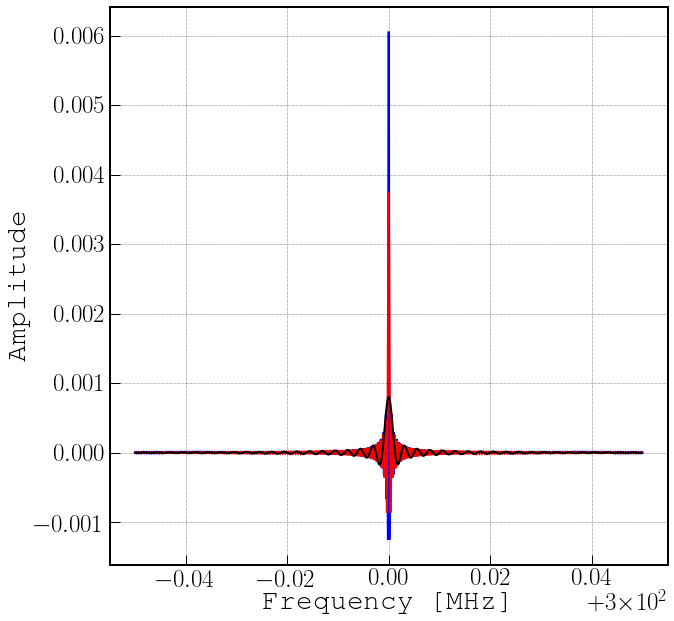

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f/MHz, sinc(f-f0, T), 'b')
ax.plot(f/MHz, sinc(f-f0, T/2), 'r')
ax.plot(f/MHz, sinc(f-f0, T/10), 'k')
# ax.plot(f/MHz, l3, 'k')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both');

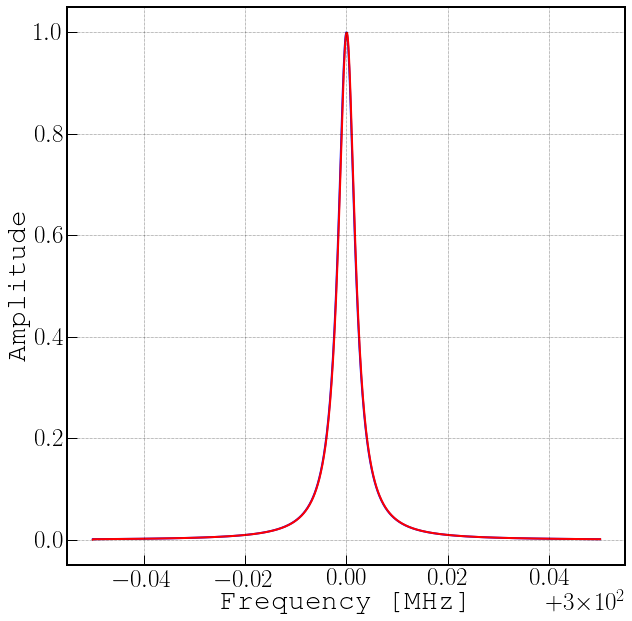

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f/MHz, l1, 'b')
ax.plot(f/MHz, m, 'r')
# ax.plot(f/MHz, l3, 'k')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both');